# COMP5318 - Machine Learning and Data Mining 

## Tutorial 9 - Clustering

**Semester 2, 2020**

**Objectives:**

* To learn about k-means clustering algorithm. 
* To learn about Gaussian mixture models (GMM). 
* To learn about expectation–maximization (EM).

**Instructions:**

* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab10.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab10.ipynb" file
* Complete exercises in "lab10.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO** or **Answer**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

 ------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

## 1. K-means clustering

*Step 1:* **Generate/collect data**

In [2]:
#This is a function to generate data.
def gen_data(means, covs, weights, n_datapoints):
    n_datapoints = np.hstack((0, n_datapoints))
    data = np.empty((n_datapoints.sum(), 2))
    for i in range(len(means)):
        data[np.sum(n_datapoints[:(i+1)]):np.sum(n_datapoints[:(i+2)]), :] \
            = np.clip(weights[i]*np.random.multivariate_normal(means[i], covs[i], n_datapoints[i+1]), -10, 10)
    return data

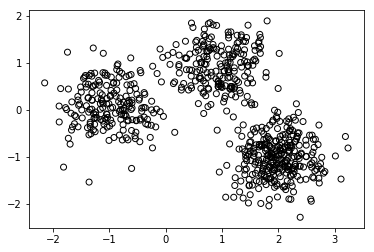

In [3]:
means = np.array([[1, 1], [-1, 0], [2, -1]])

covs = [np.array([[0.2, 0], [0, 0.2]]),
        np.array([[0.2, 0], [0, 0.2]]),
        np.array([[0.2, 0], [0, 0.2]])]

mixing_coef = np.array([1, 1, 1])

n_datapoints = np.array([200, 200, 300])

X = gen_data(means, covs, mixing_coef, n_datapoints) #np.reshape(, (s, s))

pl.scatter(X[:,0], X[:,1], marker='o', c='', edgecolor='k') #Data

*Step 2:* **Assigning 3 random points as cluster centers.**

In [4]:
K = 3  # There are three clusters in this dataset
N = X.shape[0]
k_means_cluster_centers = X[np.random.randint(0, N, size=K), :]
print('k_means_cluster_centers=\n', k_means_cluster_centers)

k_means_cluster_centers=
 [[ 2.11622029 -1.10287806]
 [-0.65080621  0.72963145]
 [ 1.12821535  1.16444582]]


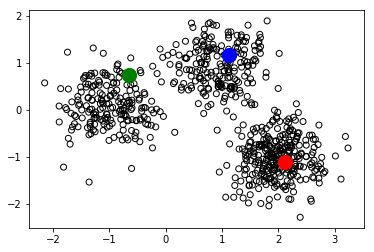

In [5]:
#Plotting
pl.scatter(X[:,0], X[:,1], marker='o', c='', edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

*Step 3:* **Calculating the distance to each cluster**

In [6]:
distance_to_each_cluster = np.zeros((X.shape[0], K))
for k in range(K):
    distance_to_each_cluster[:, k] = ((X - k_means_cluster_centers[k])**2).sum(axis=1)
print('Distance to each cluster: k=1, k=2 & k=3\n', distance_to_each_cluster)

Distance to each cluster: k=1, k=2 & k=3
 [[3.56792900e+00 2.54975731e+00 7.31830354e-01]
 [4.04564479e+00 4.42922978e+00 2.41120076e-01]
 [2.75272187e+00 4.03520145e+00 6.94405938e-01]
 ...
 [8.30955932e-01 8.88262799e+00 2.95710134e+00]
 [1.12570725e-01 9.20936161e+00 4.57129510e+00]
 [8.43959549e-04 1.11768618e+01 6.26145457e+00]]


*Step 4:* **Determing the cluster for each point**

k_means_labels= [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2
 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 

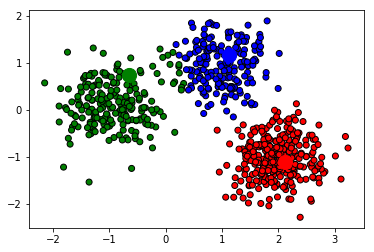

In [7]:
k_means_labels = distance_to_each_cluster.argmin(axis=1)
print('k_means_labels=', k_means_labels)

colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

*Step 5:* **Calculating cluster centers**

In [8]:
k_means_cluster_centers = np.vstack([X[k_means_labels == k, :].mean(axis=0) for k in range(K)]) 
print(k_means_cluster_centers)

[[ 1.99217401 -1.02424461]
 [-0.90386772  0.13835875]
 [ 1.01479628  0.94304556]]


*Step 6:* **Repeating steps 3 and 4**

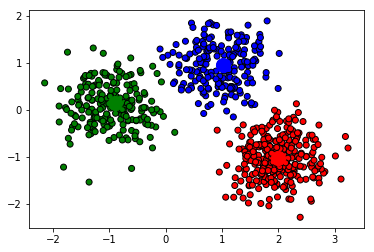

In [9]:
#Repeat steps 
distance_to_each_cluster = np.zeros((X.shape[0], K))
for k in range(K):
    distance_to_each_cluster[:, k] = ((X - k_means_cluster_centers[k, :])**2).sum(axis=1)
k_means_labels = distance_to_each_cluster.argmin(axis=1)

colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

*Step 7:* **Repeating steps 5 and 6 iteratively**

In [10]:
def k_means(X, K):
    # Initialization
    N = X.shape[0]
    distance_to_each_cluster = np.zeros((N, K))
    k_means_cluster_centers = X[np.random.randint(0, N, size=K), :]
    loss = np.finfo(float).max

    max_iter = 100
    for i in range(max_iter):
        loss_old = loss

        # TODO: E-step, update indicators
        for k in range(K):
            distance_to_each_cluster[:, k] = 
        k_means_labels = 

        # TODO: M-step, update means
        k_means_cluster_centers = 
        
        # TODO: Calculate loss function 
        loss = 

        #Stop if the
        if (loss_old - loss)/loss_old < 1e-5:
            break
    return k_means_labels, k_means_cluster_centers

In [11]:
k_means_labels, k_means_cluster_centers = k_means(X, K=3)

*Step 8:* **Plotting the final result**

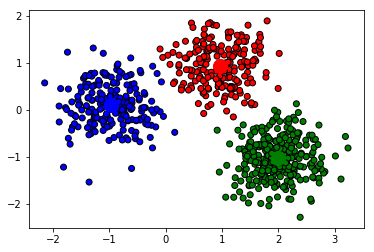

In [12]:
colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2
pl.scatter(k_means_cluster_centers[2,0], k_means_cluster_centers[2,1], c='b', s=200) #Cluster center 3

**Exercise 1.1**: Perform k-means clustering for the following dataset.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


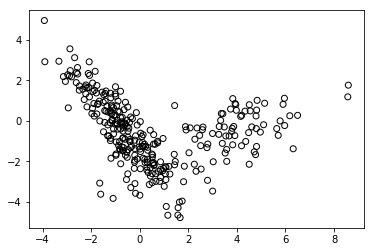

In [13]:
means = np.array([[3, -1], [-1, 0]])

covs = [np.array([[4,  2], [2, 2]]),
        np.array([[1, -2], [-2, 3]])]

mixing_coef = np.array([1, 1])

n_datapoints = np.array([100, 200])

X = gen_data(means, covs, mixing_coef, n_datapoints) 

pl.scatter(X[:,0], X[:,1], marker='o', c='', edgecolor='k') 

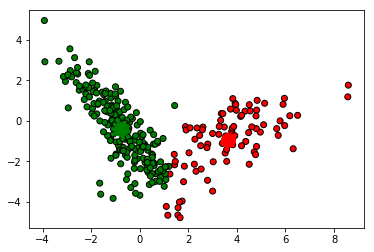

In [14]:
k_means_labels, k_means_cluster_centers = k_means(X, K=2)

colors = ['r', 'g', 'b']
pl.scatter(X[:,0], X[:,1], marker='o', c=np.array(colors)[k_means_labels], edgecolor='k') #Data
pl.scatter(k_means_cluster_centers[0,0], k_means_cluster_centers[0,1], c='r', s=200) #Cluster center 1
pl.scatter(k_means_cluster_centers[1,0], k_means_cluster_centers[1,1], c='g', s=200) #Cluster center 2

## 2. Mixture of Gaussians Model

Please refer lecture slides.

**Step 1:** Initialize means $\pmb{\mu}_k$, covariances $\pmb{\Sigma}_k$ and mixing coefficients $\pi_k$

**Step 2:** E-step
\begin{equation}
    \gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(\pmb{x}_n \lvert, \pmb{\mu}_k, \pmb{\Sigma}_k)}
    {\sum_{j=1}^{K} \pi_j \mathcal{N}(\pmb{x}_n \lvert, \pmb{\mu}_j, \pmb{\Sigma}_j)}
\end{equation}

**Step 3:** M-step
\begin{equation}
    \pmb{\mu}_{k}^{\text{new}} = \frac{1}{N_k} \sum_{n=1}^{N}
        \gamma(z_{nk}) \pmb{x}_n
\end{equation}

\begin{equation}
    \pmb{\Sigma}_{k}^{\text{new}} = \frac{1}{N_k} \sum_{n=1}^{N}
     \gamma(z_{nk}) (\pmb{x}_n - \pmb{\mu}_{k}^{\text{new}} )
     (\pmb{x}_n - \pmb{\mu}_{k}^{\text{new}} )^\top
\end{equation}

\begin{equation}
    \pi_{k}^{\text{new}} = \frac{N_k}{N}
\end{equation}

**Step 4:** Evaluate log-likelihood
\begin{equation}
    \ln p(\pmb{X} \lvert \pmb{\mu}, \pmb{\Sigma}, \pmb{\pi}) =
   \sum_{n=1}^{N} \ln \bigg( \sum_{k=1}^{K} \pi_k \mathcal{N}(\pmb{x}_n \lvert \pmb{\mu}_k, \pmb{\Sigma}_k) \bigg)
\end{equation}

In [15]:
from scipy.stats import multivariate_normal as mvn
from mpl_toolkits.mplot3d import Axes3D

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


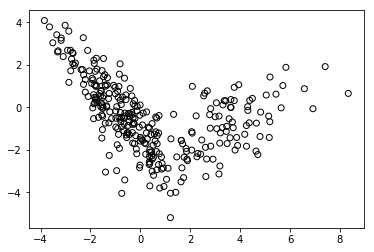

In [16]:
means = np.array([[3, -1], [-1, 0]])

covs = [np.array([[4,  2], [2, 2]]),
        np.array([[1, -2], [-2, 3]])]

mixing_coef = np.array([1, 1])

n_datapoints = np.array([100, 200])

X = gen_data(means, covs, mixing_coef, n_datapoints) 

pl.scatter(X[:,0], X[:,1], marker='o', c='', edgecolor='k') 

In [17]:
def gmm(xs, tol=0.01, max_iter=100):
    
    # Step 1 - Initial guesses for parameters
    pi_k = np.random.random(2)
    pi_k /= pi_k.sum()
    mu_k = np.random.random((2,2))
    Sigma_k = np.array([np.eye(2)] * 2)

    n, p = xs.shape
    k = len(pi_k)

    log_likelihood_old = 0
    for i in range(max_iter):
        exp_A = []
        exp_B = []
        log_likelihood_new = 0

        # Step 2 - E-step
        ws = np.zeros((k, n))
        for j in range(len(mu_k)):
            for i in range(n):
                ws[j, i] = pi_k[j] * mvn(mu_k[j], Sigma_k[j], allow_singular=True).pdf(xs[i])
        ws /= ws.sum(0)

        # Step 3 - M-step
        mu_k = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mu_k[j] += ws[j, i] * xs[i]
            mu_k[j] /= ws[j, :].sum()

        Sigma_k = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mu_k[j], (2,1))
                Sigma_k[j] += ws[j, i] * np.dot(ys, ys.T)
            Sigma_k[j] /= ws[j,:].sum()

        pi_k = np.zeros(k)
        for j in range(len(mu_k)):
            for i in range(n):
                pi_k[j] += ws[j, i]
        pi_k /= n
            
        # Step 4 - update complete log likelihoood
        log_likelihood_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pi_k[j] * mvn(mu_k[j], Sigma_k[j], allow_singular=True).pdf(xs[i])
            log_likelihood_new += np.log(s)

        if np.abs(log_likelihood_new - log_likelihood_old) < tol:
            break
        log_likelihood_old = log_likelihood_new

    return log_likelihood_new, pi_k, mu_k, Sigma_k

#Code adopted from http://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html 

In [18]:
log_likelihood, pi_k, mu_k, Sigma_k = gmm(X)

print('pi={}, \n mu={}, \n Sigma={}'.format(pi_k, mu_k, Sigma_k))

pi=[0.34846057 0.65153943], 
 mu=[[ 2.91154243 -1.12994683]
 [-0.93954508 -0.05553601]], 
 Sigma=[[[ 3.43039766  1.60703918]
  [ 1.60703918  1.84709236]]

 [[ 1.34464758 -1.70208254]
  [-1.70208254  2.8598782 ]]]


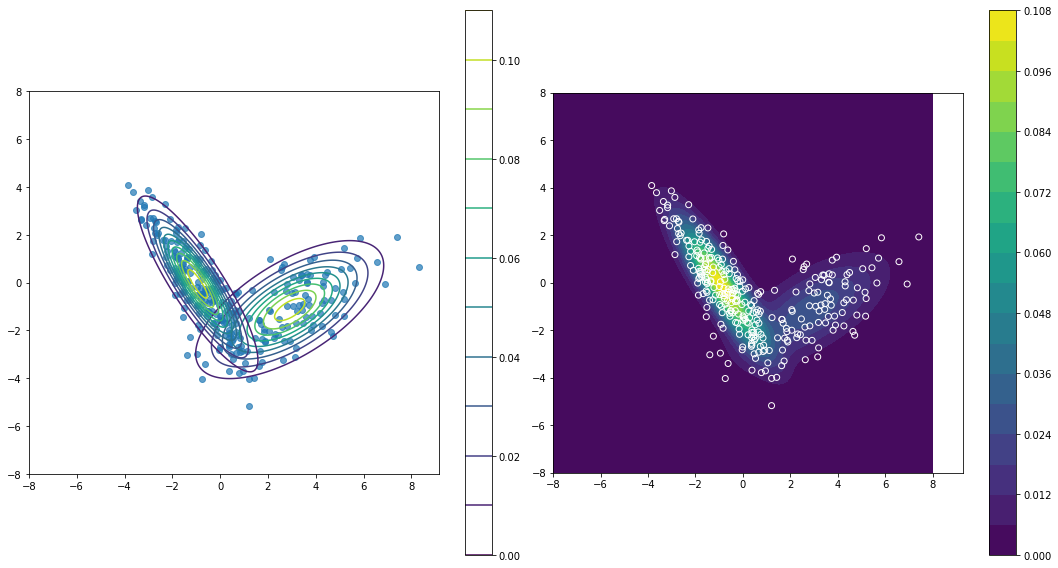

In [19]:
n = 500
xx, yy = np.meshgrid(np.linspace(-8, 8, n), np.linspace(-8, 8, n))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

pl.figure(figsize=(15, 8))
ax = pl.subplot(121)
pl.scatter(X[:,0], X[:,1], alpha=0.7)
for pi, mu, sigma in zip(pi_k, mu_k, Sigma_k):
    z = pi*mvn(mu, sigma).pdf(xy)
    pl.contour(xx, yy, z.reshape((n, n)), 10)
pl.colorbar()
ax.axes.set_aspect('equal')
pl.tight_layout()

ax = pl.subplot(122)
z = np.zeros(len(xy))
for pi, mu, sigma in zip(pi_k, mu_k, Sigma_k):
    z += pi*mvn(mu, sigma).pdf(xy)
pl.contourf(xx, yy, z.reshape((n, n)), 20); pl.colorbar()
pl.scatter(X[:,0], X[:,1], c='', edgecolor='w')
ax.axes.set_aspect('equal')
pl.tight_layout()

**Exercise:** Plot log-likelihood vs. number of iterations. Make an animation for 100 iterations and visually observe how the Gaussians converge. 

## 3. K-means for image compression

Example 1

Refer: http://scikit-learn.org/stable/modules/clustering.html

Text(0.5, 1.0, 'Recreated image: 64 colors')

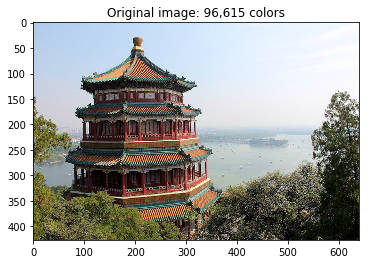

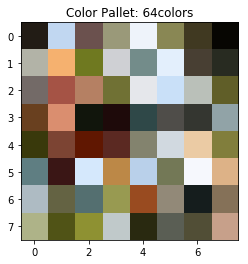

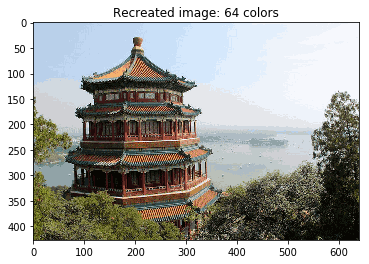

In [20]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
img = load_sample_image("china.jpg")
img.shape, img.dtype

china = np.array(img, dtype=np.float64) / 255

pl.figure()
pl.imshow(china)
pl.title('Original image: 96,615 colors')

n_colors = 64

# Transform image into a 2D numpy array
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

image_array.shape
k_means = KMeans(init='k-means++', n_clusters=n_colors)

image_array_sample = image_array.copy()
np.random.shuffle(image_array_sample)
image_array_sample = image_array_sample[:1000]
k_means.fit(image_array_sample)

colorPallete = k_means.cluster_centers_

pl.figure()
pl.imshow(colorPallete.reshape((n_colors//8, 8, 3)), interpolation="none")
pl.title('Color Pallet: '+str(n_colors)+'colors');

predicted_labels = k_means.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

recreated_image = recreate_image(colorPallete, predicted_labels, china.shape[0], china.shape[1])

pl.figure()
pl.imshow(recreated_image)
pl.title('Recreated image: {} colors'.format(n_colors))

Example 2

Text(0.5, 1.0, 'Recreated image: 8 colors')

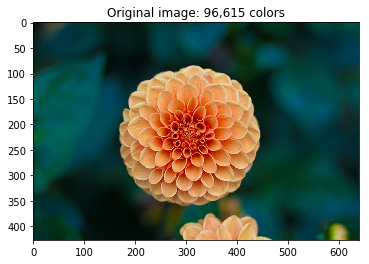

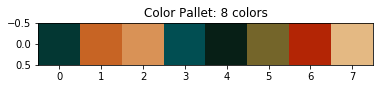

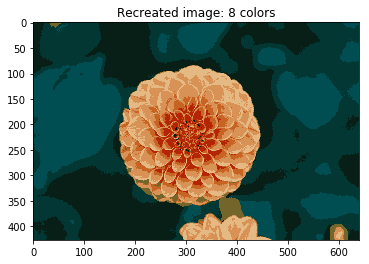

In [21]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
img = load_sample_image("flower.jpg")
img.shape, img.dtype

china = np.array(img, dtype=np.float64) / 255

pl.figure()
pl.imshow(china)
pl.title('Original image: 96,615 colors')

n_colors = 8

# Transform image into a 2D numpy array
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

image_array.shape
k_means = KMeans(init='k-means++', n_clusters=n_colors)

image_array_sample = image_array.copy()
np.random.shuffle(image_array_sample)
image_array_sample = image_array_sample[:1000]
k_means.fit(image_array_sample)

colorPallete = k_means.cluster_centers_

pl.figure()
pl.imshow(colorPallete.reshape((n_colors//8, 8, 3)), interpolation="none")
pl.title('Color Pallet: '+str(n_colors)+' colors');

predicted_labels = k_means.predict(image_array)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

recreated_image = recreate_image(colorPallete, predicted_labels, china.shape[0], china.shape[1])

pl.figure()
pl.imshow(recreated_image)
pl.title('Recreated image: {} colors'.format(n_colors))

**Exercise: ** Plot compression ratio vs. number of clusters. 